# Introduction: Multiple Linear Regression with the Ames Housing Dataset

Welcome to this Jupyter Notebook, where we'll be delving into the intricacies of multiple linear regression using the **Ames Housing Dataset**. Multiple linear regression is a natural extension of simple linear regression and is employed when we want to predict a continuous target variable based on multiple input features.

### Objective:
Our primary goal is to understand the relationships between various features of a house, such as its size, overall quality, exterior quality, and others, and its sale price. By constructing a multiple linear regression model, we aim to predict house prices based on these selected features and assess the accuracy and performance of our model using various metrics.

$$\Large \displaystyle \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2}+ ...++ \hat{\beta}_p x_{ip}$$

 - $\hat{y}_i$ is the predicted value of the dependent variable (house price) for the $i^{th}$ observation.
 - $\hat{\beta}_0$ is the y-intercept of the regression line.
 - $\hat{\beta}_j$ represents the coefficient of the $j^{th}$ feature.
 - $x_ij$ is the value of the the $j^{th}$ feature for the $i^{th}$ observation.
 - $p$ is the total number of features used in the model.


### Dataset Overview:
The Ames Housing Dataset provides a comprehensive snapshot of the housing market in Ames, Iowa. It contains detailed information about various attributes of houses, from their physical characteristics to sale details. 

### Structure of this Notebook:
1. [Installing and Importing Necessary Libraries](#ch1)
2. [Loading the Ames Housing Dataset](#ch2)
3. [Data Processing](#ch3)
4. [Splitting the Data](#ch4)
5. [Training the Linear Regression Model](#ch5)
6. [Estimating Relative Importance of Parameters](#ch6)
7. [Making Predictions](#ch7)
8. [Evaluating the Model](#ch8)
9. [Conclusion](#ch9)

By the end of this notebook, you'll have a clear understanding of how to build, train, and evaluate a simple linear regression model using Python and scikit-learn. Let's get started!

## 1. Installing and Importing Necessary Libraries <a id='ch1'></a>

Before starting our analysis, we need to import the necessary Python libraries that will be used throughout this notebook:

- **`pandas`**: A powerful data manipulation and analysis library. It provides data structures for efficiently storing large datasets and tools for reshaping, aggregating, and merging data.

- **`matplotlib.pyplot`** and **`seaborn`**: Plotting libraries for Python. While `matplotlib` provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits, `seaborn` offers a high-level interface for drawing attractive and informative statistical graphics. In this notebook, we'll use them for various visualizations, including the relationship between variables and the importance of model coefficients.

- **`sklearn.datasets`**: This module from scikit-learn provides access to various datasets, including the **Ames Housing dataset**. It's a convenient way to quickly load data for experimentation.

- **`sklearn.model_selection`**: This module provides the `train_test_split` function, which is essential for splitting our dataset into training and testing sets. This allows us to evaluate the performance of our model on unseen data.

- **`sklearn.linear_model`**: This module contains the `LinearRegression` class, a fundamental algorithm in machine learning for predicting a continuous target variable based on one or more input features.

- **`sklearn.metrics`**: This module provides utility functions to evaluate the performance of our model. In this notebook, we'll use the `mean_squared_error` function to quantify the difference between the predicted and actual house prices.

- **`sklearn.impute`**: This module provides the `SimpleImputer` class, which allows us to handle missing data by replacing them with a specified strategy, such as the mean or the most frequent value.

- **`sklearn.preprocessing`**: Additionally, we'll use the `StandardScaler` to standardize our data, ensuring that each feature has a mean of 0 and a standard deviation of 1. Standardizing the data is especially important in multiple regression to compare the relative importance of coefficients and to ensure that the optimization algorithm used in training converges more efficiently.

By importing these libraries at the beginning, we ensure that all the necessary tools are readily available as we proceed with the analysis.

In [1]:
# If using Jupyter Notebook and pip is available, you can install directly using the following:
# !pip install pandas matplotlib seaborn scikit-learn 

Uncomment the second line of code above to install the necessary libraries.

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## 2. Loading the Amex Housing Dataset <a id='ch2'></a>

The **Ames Housing Dataset** is a comprehensive dataset that provides detailed information about individual residential homes in Ames, Iowa. It contains **79 explanatory variables** describing various aspects of the houses, such as their physical characteristics, location, and sale details. Given the richness of this dataset, it's a popular choice for regression analysis in machine learning.

For this analysis, we'll utilize 10 of the available features in the dataset to predict the sale price of the houses:

- `GrLivArea`: This represents the above-ground living area in square feet. It's intuitive that the size of the living area would be a significant predictor of house price.

- `OverallQual`: This is an overall material and finish quality rating, ranging from 1 (very poor) to 10 (very excellent). Houses with higher quality materials and finishes generally sell for higher prices.

- `YearBuilt`: The year the house was originally constructed. Newer houses might fetch higher prices due to modern design, better insulation, newer materials, etc.

- `TotalBsmtSF`: Total square feet of the basement area. A larger basement can add significant value to a house, especially if it's finished.

- `GarageCars`: Size of the garage in car capacity. A larger garage can add value, especially in areas where parking is at a premium or where winters are harsh.

- `GarageArea`: Size of the garage in square feet. A larger garage can add value to a property.

- `1stFlrSF`: First-floor square feet. The size of the first floor can be a significant factor in house pricing.

- `FullBath`: Number of full bathrooms above grade. Bathrooms can significantly influence a home's value.

- `CentralAir`: Central air conditioning can be a significant factor in home pricing, especially in areas with hot summers.

- `ExterQual`: Evaluates the quality of the material on the exterior. High-quality materials can enhance the curb appeal and durability of a home, thus affecting its price.

These features capture various aspects of a house, including its size, quality, age, and amenities. Including a mix of continuous (like `GrLivArea` and `TotalBsmtSF`) and categorical (like `OverallQual`) features can provide a comprehensive view of the house's characteristics.

To load the dataset, we use the `fetch_openml` function from scikit-learn. This function fetches datasets from the **OpenML repository**, making it easy to access a wide range of datasets for machine learning and data analysis.

In [3]:
# Fetch the Ames Housing Dataset and load it as a pandas DataFrame
housing = fetch_openml(name="house_prices", as_frame=True)

# Define the entire dataset as X
X = housing.data

# Select the desired independent variables (features) 
selected_features = [
    'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', 
    'GarageArea', '1stFlrSF', 'FullBath', 'CentralAir', 'ExterQual'
]

# Extract these features from the dataset
X_selected = X[selected_features]

# Set the target variable as the sale price of the houses
y = housing.target

## 3. Data Processing <a id='ch3'></a>

The `SettingWithCopyWarning` is a common warning in pandas and arises when you try to modify a subset of a DataFrame, which might be a view rather than a copy. This can lead to unexpected behavior because changes to the subset might not reflect in the original DataFrame or vice versa.

To fix this, we explicitly create a copy of the DataFrame before making modifications. This ensures that we're working with an independent copy and not a view of the original data.

By using `X_clean = X.copy()`, we create an explicit copy of the data, and then all modifications are made to this copy, avoiding the warning.

In [4]:
# Create a copy of the data to avoid SettingWithCopyWarning
X_clean = X_selected.copy()

Data preprocessing is a crucial step in the machine learning pipeline. It involves preparing the raw data to make it suitable for model training. For the Ames Housing Dataset, we'll focus on two main preprocessing tasks:

1. <span style="color:red">**Handling Missing Values**</span>: Real-world datasets often contain missing values, which can affect the performance of machine learning algorithms. Instead of removing rows with missing values, we'll address this by imputing them. For numerical columns, we'll replace missing values with the mean of the column, and for categorical columns, we'll replace them with the most frequent value. Imputation helps in retaining valuable data that would otherwise be lost if we simply removed rows with missing values.

2. <span style="color:red">**Encoding Categorical Variables**</span>: Machine learning models require numerical input, so categorical variables (like neighborhood names or zoning types) need to be converted into a numerical format. One common method is one-hot encoding, which creates binary columns for each category and indicates the presence of the category with a 1 or 0.

3. <span style="color:red">**Standardizing Variables**</span>: In multiple regression, especially when comparing the relative importance of coefficients, it's beneficial to standardize the features. This means transforming them to have a mean of 0 and a standard deviation of 1. Standardizing the data ensures that each feature contributes equally to the model's performance and helps with the optimization algorithm's convergence during training.

Let's proceed with these preprocessing steps:

### 3.1 - Handle Missing Values

In [5]:
# Identify numerical columns (excluding the target variable if it's in the dataset)
num_cols = X_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Identify categorical columns
cat_cols = X_clean.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Define imputer for numerical columns (using mean as the default strategy)
num_imputer = SimpleImputer(strategy="mean")

# Define imputer for categorical columns (using the most frequent value as the strategy)
cat_imputer = SimpleImputer(strategy="most_frequent")

# Impute missing values for numerical columns
X_clean[num_cols] = num_imputer.fit_transform(X_clean[num_cols])

# Impute missing values for categorical columns
X_clean[cat_cols] = cat_imputer.fit_transform(X_clean[cat_cols])

### 3.2 - Encoding Categorical variables 

In [6]:
# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X_clean)

### 3.3 - Standardizing Numerical Variables 

In [7]:
# Initialize the StandardScaler to standardize features
scaler = StandardScaler()

# Fit to the data and transform it to have mean=0 and variance=1
X_standardized = scaler.fit_transform(X_encoded)

### Aligning Target Data with Processed Features

After preprocessing the feature matrix (`X_encoded`), it's crucial to ensure that our target variable (`y`) aligns with it. The preprocessing steps might have changed the order or number of rows in the feature matrix, especially if any rows were dropped due to missing values or other reasons.

In [8]:
# Update the target variable to match the rows of the cleaned data
y_clean = y.loc[X_encoded.index]

ensures that the target variable, `y_clean`, matches the order and number of rows in our processed feature matrix, `X_encoded`. This alignment is vital for training machine learning models, as each row in the feature matrix must correspond to the correct target value.

When you use `y.loc[X_encoded.index]`, it will select the rows from `y` that correspond to the indices in `X_encoded.index` and maintain the same order as in `X_encoded.index`.

So, if `X_encoded.index` has the order `[5, 3, 8, 1]` (just as an example), then `y.loc[X_encoded.index]` will select the rows from `y` with those indices in that exact order: `[5, 3, 8, 1]`.

## 4. Splitting the Data: <a id='ch4'></a>

Before training our linear regression model, it's essential to split the dataset into two parts: a <span style="color:red">**training set**</span> and a <span style="color:red">**testing set**</span>. This allows us to train our model on one subset of the data and then test its performance on a separate, unseen subset. This approach helps evaluate how well our model is likely to perform on new, unseen data.

In this notebook, we're using the `train_test_split` function from scikit-learn to achieve this split:

- `X_train`, `y_train`: These are the features and target variable for the training set, respectively. The model will learn from this data.

- `X_test`, `y_test`: These are the features and target variable for the testing set, respectively. We'll use this data to evaluate the model's performance.

We've reserved 20% of the data for testing (`test_size=0.2`). The random_state parameter is set to 1337, ensuring that the data split is reproducible. This means that every time we run this code, we'll get the same train/test split, which is useful for consistent results and comparisons.

In [9]:
# Split the preprocessed data into training and testing sets, with 20% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_clean, test_size=0.2, random_state=1337)

## 5. Training the Linear Regression Model: <a id='ch5'></a>

Once we have our data prepared and split into training and testing sets, the next step is to train our model. For this analysis, we're using a multiple linear regression model from scikit-learn's `LinearRegression` class.

The code for training the model is straightforward:

- `model = LinearRegression()`: Here, we <span style="color:red">**initialize**</span> the linear regression model.

- `model.fit(X_train, y_train)`: With this line, we <span style="color:red">**train**</span> the model using the training data. The model learns the relationship between multiple features and the target variable (`SalePrice`) from this data.

By the end of this step, our model will have learned the best-fit line that describes the relationship between the house's above-ground living area and its sale price, based on the training data.

In [10]:
# Initialize the Multiple Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

## 6. Estimating Relative Importance of Parameters: <a id='ch6'></a>

After training our multiple regression model, it's beneficial to understand the coefficients that the model has learned. These coefficients represent the change in the dependent variable (in this case, `SalePrice`) for a one-unit change in the respective feature, holding all other features constant.

In the context of multiple regression, especially when features have been standardized, the magnitude of these coefficients can give us an idea about the **relative importance** of each feature in predicting the target variable.

To visualize the relative importance of each feature, we can plot the coefficients on a bar plot:

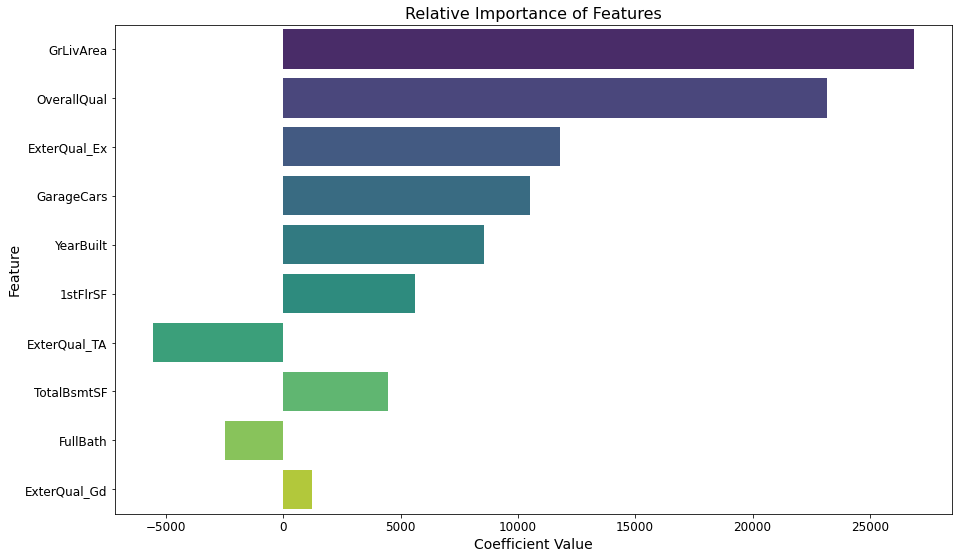

In [11]:
# Extract coefficients from the trained model
coefficients = model.coef_

# Create a DataFrame for coefficients and their corresponding feature names
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the magnitude of coefficients
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Plot the top 10 coefficients with specified dimensions
plt.figure(figsize=(15, 9))
sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', palette='viridis')
plt.title('Relative Importance of Features', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

By examining this plot, we can identify which features have the most significant <span style="color:limegreen">**positive**</span> or <span style="color:red">**negative**</span> impact on the house price. Remember, a positive coefficient indicates a positive relationship with the target variable, while a negative coefficient indicates an inverse relationship.

### Most Influential Variables in Predicting House Prices

From our analysis, the top three most influential variables in predicting house prices in the Ames Housing dataset are:

- `GrLivArea`: This variable represents the above-ground living area in square feet. Its <span style="color:limegreen">positive</span> coefficient suggests that houses with larger living areas tend to have higher prices, which is intuitive as larger homes often command higher prices.
- `OverallQual`: Representing the overall material and finish quality of the house, this variable has a <span style="color:limegreen">positive</span> coefficient. This indicates that houses with better quality materials and finishes are priced higher, reflecting the premium that buyers are willing to pay for better quality homes.
- `ExterQual_Ex`: This variable indicates if the exterior quality of the house is excellent. Its <span style="color:limegreen">positive</span> coefficient suggests that houses with excellent exterior quality tend to have higher prices, emphasizing the importance of curb appeal and exterior condition in determining house prices.

## 7. Making Predictions: <a id='ch7'></a>

Now that our multiple regression model has been trained using various features from the Ames Housing Dataset, we can proceed to make predictions on our testing set. This step is pivotal as it allows us to evaluate the model's performance on data it hasn't seen before, providing insights into its potential real-world applicability.

To make these predictions, we utilize the predict method of the `LinearRegression` class. It takes in the features from our standardized testing set (`X_test`) and returns the predicted values for our target variable, `SalePrice`.

In [12]:
# Use the trained model to make predictions on the standardized testing set
y_pred = model.predict(X_test)

## 8. Evaluating the Model: <a id='ch8'></a>

After making predictions with our trained model, it's crucial to evaluate its performance. Two common metrics used for regression tasks are:

1. <span style="color:red">**Mean Squared Error (MSE)**</span>: Measures the average squared difference between the actual values (`y_test`) and the predicted values (`y_pred`). A lower MSE indicates a better fit of the model to the data, while a higher MSE suggests potential underfitting or overfitting. The formula for MSE is given by:

$$\Large \displaystyle \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

 - $n$ is the total number of observations
 - $y_i$ is the actual value of the observation
 - $\hat{y}_i$ is the predicted value of the observation

2. <span style="color:red">**Coefficient of Determination ($R^2$ value)**</span>: Represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An $R^2$ value closer to 1 indicates a better fit. The formula for $R^2$ is:

$$\Large \displaystyle R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$$

 - $\text{SS}_{\text{res}}$ represents the the sum of the squared residuals
 - $\text{SS}_{\text{tot}}$ represents the total sum of squares

In this section, we compute both the MSE using scikit-learn's `mean_squared_error` function and the $R^2$ value using the `score` method of our trained model. These values give us a quantitative measure of how well our linear regression model predicts house prices based on the living area.

In [13]:
# Calculate the Mean Squared Error between the actual and predicted values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate the R^2 value
r2 = model.score(X_test, y_test)
print(f"R-squared Value: {r2:.2f}")

Mean Squared Error: 750652627.88
R-squared Value: 0.83


## 9. Conclusion: <a id='ch9'></a>

Throughout this analysis, we delved deep into the Ames Housing dataset, exploring the relationships between various features and the target variable: house prices. Our journey began with a simple linear regression model, which provided a foundational understanding of the data's structure and the potential predictors.

The initial model, focusing solely on the living area of houses, achieved an $R^2$ value of 49.2%. While this was a decent starting point, it indicated that nearly half of the variability in house prices was left unexplained by the model.

Recognizing the potential for improvement, we expanded our model to include a broader set of features. By incorporating variables like the overall quality of materials and finishes, and the exterior quality, we aimed to capture more nuances in the data. The results were promising: our multiple regression model achieved an $R^2$ value of 82.7%, a substantial increase from the initial model. This improvement signifies that the model now explains over 82% of the variability in house prices, a commendable feat given the complexity of real estate pricing.

Furthermore, the **mean squared error (MSE)**, a metric indicating the average squared difference between actual and predicted prices, decreased by approximately two thirds. This reduction in MSE underscores the enhanced accuracy of our refined model.

In conclusion, the size of the living area, the overall quality of materials and finishes, and the exterior quality play significant roles in determining house prices in the Ames Housing dataset. All three variables positively influence the price, highlighting the value of size, quality, and aesthetic appeal in the real estate market. The journey from our simple to multiple regression model underscores the importance of feature selection and the potential of machine learning in making more accurate predictions